# Imports

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree

# Read the data

In [2]:
data = pd.read_csv('./data/bank-full.csv', sep = ';')

In [3]:
data.shape

(45211, 17)

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

In [7]:
for column in data.columns:
    
    if column in categorical_columns:
        
        print(np.unique(data[column].values))
        print('\n')

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


['divorced' 'married' 'single']


['primary' 'secondary' 'tertiary' 'unknown']


['no' 'yes']


['no' 'yes']


['no' 'yes']


['cellular' 'telephone' 'unknown']


['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']


['failure' 'other' 'success' 'unknown']


['no' 'yes']




https://archive.ics.uci.edu/ml/datasets/Bank+Marketing?fbclid=IwAR1lVl78ldHblVgR4UZuzPxrxEID6Vuwph33nl49vPL2vLppeYuk7tizk4o

Summay of data

Categorical Variables :

[1] job: admin,technician, services, management, retired, blue-collar, unemployed, entrepreneur, housemaid, unknown, self-employed, student

[2] marital: married, single, divorced

[3] education: secondary, tertiary, primary, unknown

[4] default: has credit in default? (yes, no)

[5] housing: has housing loan? (yes, no)

[6] loan: yes, no

[7] contact: unknown, cellular, telephone

[8] month: jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec

[9] poutcome: outcome of the previous marketing campaign (unknown, other, failure, success)

[10] y: has the client subscribed a term deposit? (yes, no) - dependent variable


Numerical Variables:

[1] age

[2] balance

[3] day

[4] duration: last contact duration, in seconds (numeric)

[5] campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

[6] pdays: number of days that passed by after the client was last contacted from a previous campaign 

[7] previous: number of contacts performed before this campaign and for this client

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)

# EDA

In [8]:
data[data.isnull().any(axis = 1)].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Numeric variables

In [9]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Age

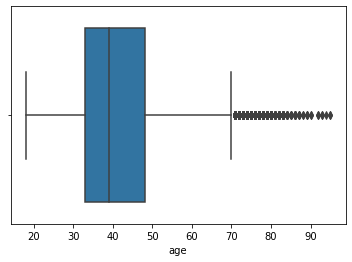

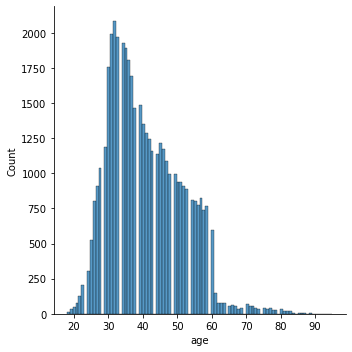

In [10]:
sns.boxplot(x = data['age'])
sns.displot(x = data['age'])

Balance

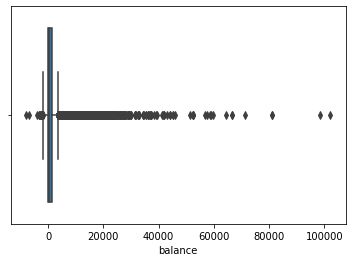

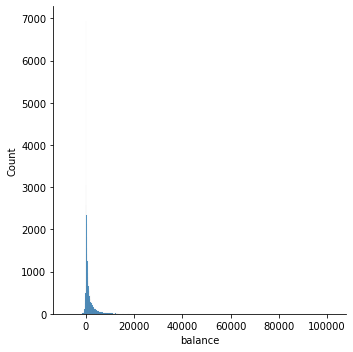

In [11]:
sns.boxplot(x = data['balance'])
sns.displot(x = data['balance'])

Day

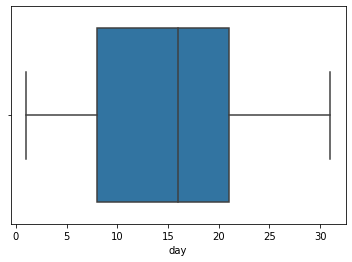

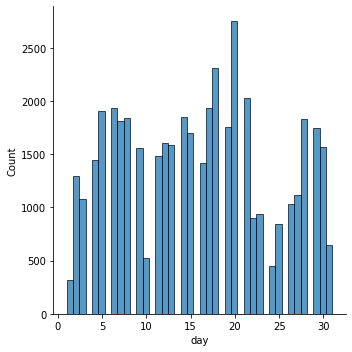

In [12]:
sns.boxplot(x = data['day'])
sns.displot(x = data['day'])

Duration

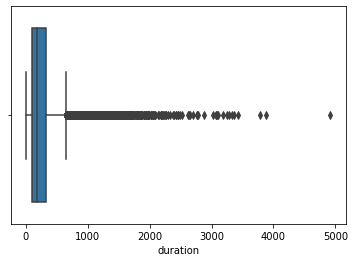

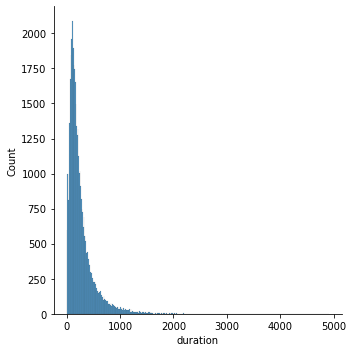

In [13]:
sns.boxplot(x = data['duration'])
sns.displot(x = data['duration'])

Campaign

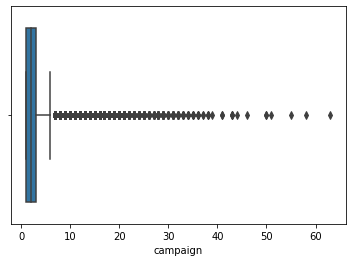

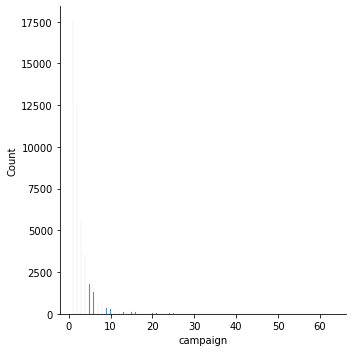

In [14]:
sns.boxplot(x = data['campaign'])
sns.displot(x = data['campaign'])

Pdays

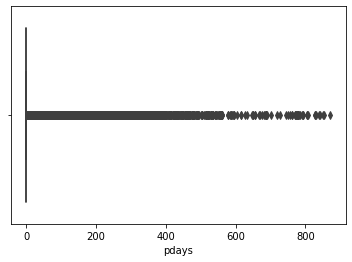

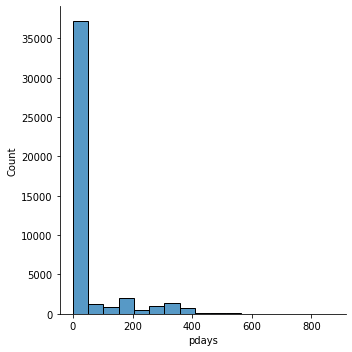

In [15]:
sns.boxplot(x = data['pdays'])
sns.displot(x = data['pdays'])

Previous

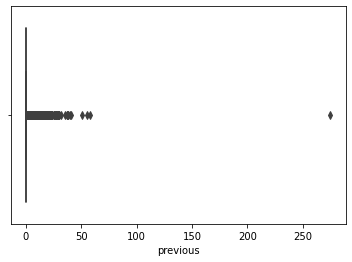

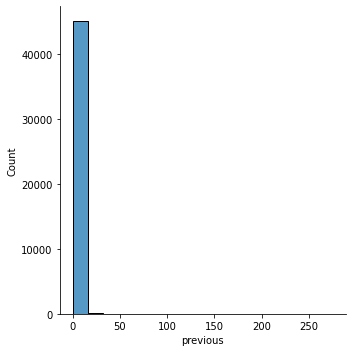

In [16]:
sns.boxplot(x = data['previous'])
sns.displot(x = data['previous'])

Scatterplot showing age and balance

<AxesSubplot:xlabel='age', ylabel='balance'>

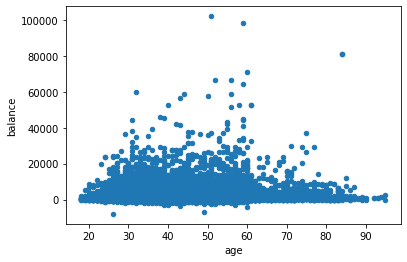

In [39]:
data.plot(kind = 'scatter', x = 'age', y = 'balance')

...

# Categorical variables

Explore people who made a deposit vs. job category

In [17]:
jobs = ['management', 'blue-collar', 'technician', 'admin.', 'services', 'retired', 'self-employed', 'student',
        'unemployed', 'entrepreneur', 'housemaid', 'unknown']

In [18]:
for j in jobs:
    print('{:15} : {:5}'. format(j, len(data[(data.y == 'yes') & (data.job == j)])))

management      :  1301
blue-collar     :   708
technician      :   840
admin.          :   631
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34


Different types of job categories and their counts

In [19]:
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Target class balance

In [20]:
data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# Change dataset structure

In [21]:
data.drop('contact', axis = 1, inplace = True)
data.drop('day', axis = 1, inplace = True)
data.drop('month', axis = 1, inplace = True)

In [22]:
data.shape

(45211, 14)

In [23]:
data['default_cat'] = data['default'].map({'yes': 1, 'no': 0})
data.drop('default', axis = 1, inplace = True)

In [24]:
data['housing_cat'] = data['housing'].map({'yes': 1, 'no': 0})
data.drop('housing', axis = 1, inplace = True)

In [25]:
data['loan_cat'] = data['loan'].map({'yes': 1, 'no': 0})
data.drop('loan', axis = 1, inplace = True)

In [27]:
data['y_cat'] = data['y'].map({'yes': 1, 'no': 0})
data.drop('y', axis = 1, inplace = True)

In [34]:
data_with_dummies = pd.get_dummies(data = data, columns = ['job', 'marital', 'education', 'poutcome'],
                                   prefix = ['job', 'marital', 'education', 'poutcome'])

In [38]:
data_with_dummies.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'default_cat', 'housing_cat', 'loan_cat', 'y_cat', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [32]:
data_with_dummies.head()

,age,balance,duration,campaign,pdays,previous,default_cat,housing_cat,loan_cat,y_cat,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,-1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
1,44,29,151,1,-1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
2,33,2,76,1,-1,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,47,1506,92,1,-1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
4,33,1,198,1,-1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [33]:
data_with_dummies.tail()

,age,balance,duration,campaign,pdays,previous,default_cat,housing_cat,loan_cat,y_cat,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
45206,51,825,977,3,-1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
45207,71,1729,456,2,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
45208,72,5715,1127,5,184,3,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
45209,57,668,508,4,-1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
45210,37,2971,361,2,188,11,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


# Main

Corr.

In [41]:
corr = data_with_dummies.corr()
corr

,age,balance,duration,campaign,pdays,previous,default_cat,housing_cat,loan_cat,y_cat,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,0.097783,-0.004648,0.004760,-0.023758,0.001288,-0.017879,-0.185513,-0.015655,0.025155,...,0.286257,-0.427817,0.196182,-0.093979,-0.081629,0.069665,-0.004927,-0.022967,0.035526,-0.000816
balance,0.097783,1.000000,0.021560,-0.014578,0.003435,0.016674,-0.066745,-0.068768,-0.084350,0.052838,...,0.025708,-0.012537,-0.015451,-0.069937,0.084001,0.011181,0.011857,0.008466,0.035240,-0.030271
duration,-0.004648,0.021560,1.000000,-0.084570,-0.001565,0.001203,-0.010021,0.005075,-0.012412,0.394521,...,-0.022683,0.020328,-0.003660,0.002084,0.000891,-0.000682,-0.018925,-0.001958,0.042389,-0.003491
campaign,0.004760,-0.014578,-0.084570,1.000000,-0.088628,-0.032855,0.016822,-0.023599,0.009980,-0.073172,...,0.031371,-0.023120,0.009616,-0.020893,0.012866,0.005704,-0.088131,-0.020107,-0.057486,0.107965
pdays,-0.023758,0.003435,-0.001565,-0.088628,1.000000,0.454820,-0.029979,0.124178,-0.022754,0.103621,...,-0.027600,0.027943,-0.017373,0.022105,-0.007568,-0.006907,0.701052,0.389791,0.228539,-0.869962
previous,0.001288,0.016674,0.001203,-0.032855,0.454820,1.000000,-0.018329,0.037076,-0.011043,0.093236,...,-0.012691,0.017006,-0.016705,-0.005603,0.022888,-0.008257,0.350627,0.306615,0.201424,-0.532763
default_cat,-0.017879,-0.066745,-0.010021,0.016822,-0.029979,-0.018329,1.000000,-0.006025,0.077234,-0.022419,...,-0.014460,0.003115,0.001623,0.013220,-0.015239,-0.001236,-0.026389,-0.014445,-0.023344,0.039490
housing_cat,-0.185513,-0.068768,0.005075,-0.023599,0.124178,0.037076,-0.006025,1.000000,0.041323,-0.139173,...,0.017681,-0.020475,0.010671,0.101659,-0.099175,-0.047595,0.106795,0.039710,-0.091360,-0.063755
loan_cat,-0.015655,-0.084350,-0.012412,0.009980,-0.022754,-0.011043,0.077234,0.041323,1.000000,-0.068185,...,0.036906,-0.051716,-0.012396,0.070625,-0.045940,-0.049992,-0.002186,-0.009099,-0.053713,0.031406
y_cat,0.025155,0.052838,0.394521,-0.073172,0.103621,0.093236,-0.022419,-0.139173,-0.068185,1.000000,...,-0.060260,0.063526,-0.040393,-0.036388,0.066448,0.012053,0.009885,0.031955,0.306788,-0.167051


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

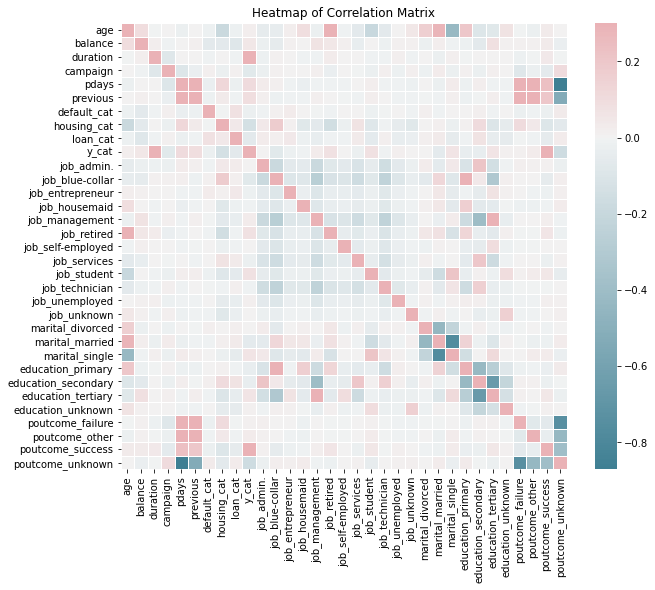

In [44]:
plt.figure(figsize = (10, 10))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, cmap = cmap, vmax = .3, center = 0, 
            square = True, linewidths = .5, cbar_kws = {'shrink': .82})

plt.title('Heatmap of Correlation Matrix')

Train/test split

In [47]:
X = data_with_dummies.drop('y_cat', 1)
y = data_with_dummies.y_cat

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

Modelling

# First model

In [53]:
dt_1 = tree.DecisionTreeClassifier()
dt_1.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
dt_1.score(X_train, y_train)

1.0

In [55]:
dt_1.score(X_test, y_test)

0.857237642375318

# Second model

In [56]:
dt_2 = tree.DecisionTreeClassifier(max_depth = 5)
dt_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [57]:
dt_2.score(X_train, y_train)

0.9024552090245521

In [58]:
dt_2.score(X_test, y_test)

0.901249585314608